In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D,Dense,Activation
from keras.applications.vgg16 import VGG16
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import matplotlib.pyplot as plt


In [2]:
size=[224,224]
train=('Train')
test=('Test')


In [3]:
def new(bottom_model,num_classes):        #adding new layers to the existing layers 
    top_model=bottom_model.output
    top_model=GlobalAveragePooling2D()(top_model)
    top_model=Dense(1024,activation='relu')(top_model)
    top_model=Dense(1024,activation='relu')(top_model)
    top_model=Dense(512,activation='relu')(top_model)
    top_model=Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [4]:
VGG = VGG16(input_shape=size + [3],weights='imagenet',include_top=False)  #using VGG 16 transfer learning model
for layer in VGG.layers:
    layer.trainable = False
folders=glob("Train//*")
x=Flatten()(VGG.output)                                              #returning a 1 D array of the output
prediction=Dense(len(folders),activation='softmax')(x)               #softmax activation is used
num_classes=2
FC_head=new(VGG,num_classes)                                       
model = Model(inputs=VGG.input, outputs=FC_head)
model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)                                     #using Adam optimizer 
model.compile(
  loss='binary_crossentropy',                                        #using binary_crossentropy as loss function 
  optimizer=opt,
  metrics=['accuracy']
)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [5]:
batch_size=32                                               #setting batch size to 16 most of the mid-tier systems keep 16-32 as their batch size 
train_datagen=ImageDataGenerator(rescale = 1./255 ,          #using image augmentation for the training dataset
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1./225,horizontal_flip=True,vertical_flip=True)  #using image augmentation for the testing dataset

train_set=train_datagen.flow_from_directory("Train",                         #generating a training dataset using image augmentation
                                            batch_size=32,
                                            target_size=[224,224],
                                            class_mode='categorical')
test_set=test_datagen.flow_from_directory("Test",                            #generating a test dataset usign image augmentation 
                                          batch_size=32,
                                          target_size=[224,224],
                                          class_mode='categorical')

Found 1238 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


In [6]:
history = model.fit(                                                          #training the model
  train_set,
  validation_data=test_set,
  epochs=20,                                                                  #training over 30 iterations
  steps_per_epoch=4,                                 #4 steps per epoch or iteration
  validation_steps=len(test_set)                                           
)

Epoch 1/20
4/4 [==============================] - 76s 19s/step - loss: 0.6937 - accuracy: 0.5938 - val_loss: 0.6477 - val_accuracy: 0.6232
Epoch 2/20
4/4 [==============================] - 80s 20s/step - loss: 0.6578 - accuracy: 0.5391 - val_loss: 0.6117 - val_accuracy: 0.7319
Epoch 3/20
4/4 [==============================] - 81s 20s/step - loss: 0.6090 - accuracy: 0.7969 - val_loss: 0.5823 - val_accuracy: 0.7826
Epoch 4/20
4/4 [==============================] - 81s 20s/step - loss: 0.5736 - accuracy: 0.8559 - val_loss: 0.5412 - val_accuracy: 0.9203
Epoch 5/20
4/4 [==============================] - 86s 21s/step - loss: 0.5477 - accuracy: 0.8125 - val_loss: 0.5078 - val_accuracy: 0.8841
Epoch 6/20
4/4 [==============================] - 86s 22s/step - loss: 0.4981 - accuracy: 0.8828 - val_loss: 0.4815 - val_accuracy: 0.7609
Epoch 7/20
4/4 [==============================] - 88s 22s/step - loss: 0.4734 - accuracy: 0.8359 - val_loss: 0.4253 - val_accuracy: 0.9275
Epoch 8/20
4/4 [===========

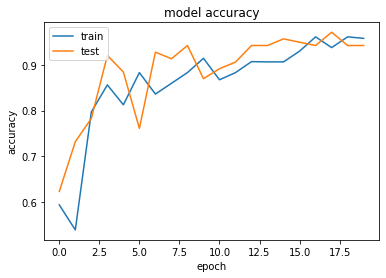

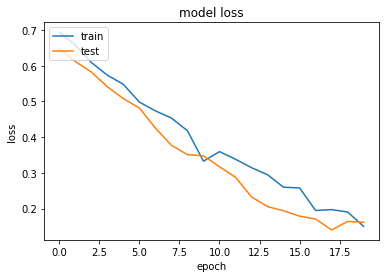

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save("model.h5")